# Practical Linear Algebra for Data Science  
From Core Concepts to Applications Using Python
(c) Mike X Cohen

Code excersises has been resolved with the help   (code examples, exercises, etc.) is available for
at https://github.com/mikexcohen/LinAlg4DataScience.

## GLOSSARY

**Vector** 
- is an arrow in space with a specific direction and length, often representing a piece of data.
- the purpose of the vector is to visually represent a piece of data
  
  <img src="./images/fig_4-1-vector.png" width="300" />
  
**Vectot dimensionality**  
- The number of elements in vector

**Norm, Magnitude**
- Geometric length of a vector

**Unit-norm**
- Gemetric length of 1
- $ \hat{v} $

**Determinant**
- Determinant describe how much a sampled area in a vector space changes in scale with linear transformations. This can provide helpful information about the transformation.
- Determinant of zero meaning a linear dependency exists
**Types of Matrices**
- Square matrix - has an equal number of rows and columns
- Identity matrix= All 0 except diagonal of 1
- Inverse matrix - matrix that undo the transofrmations of other matrix being done
- Diagonal matrix - similar to identity matrix, exept diagonal is formed by any number
- Triangular matrix - similar to identity except non zero values filling top triangle above diagonal
- Sparse matrix- formed mostly by zeros except few values

**Vectors set**
- $S,V = \{v_1,....v_n\}$ a collection of vectors

**Linear weighted combination, Linear mixture, weightd combination**
- a way of mixing information from multiple variables. Means simply vector multiplication or adition
  $w = \lambda_1 v_1 + \lambda_2 v_2 + ... + \lambda_n v_n$

**Regressor**
- predicted variable

**Coefficient**
- scalar

**Linear dependecy**
- if at least one vector in a set can be expressed as a linear weighted combination of other vectors in that set
-  $0 = \lambda_1 v_1 + \lambda_2 v_2 + ... + \lambda_n v_n$ - if true then linear dependend

**Span**
- Combination of all possible linear weighte combinations of a set of vectors. Think span of it as a verb. Span is a mechanism to create a subspace

**Vector norm**
- is vector's Equclidean geometric lenghts, which is computed as the square root fo sum if the squared vector elements
$  
\mathbf{v}\|_2 = \sqrt{v_1^2 + v_2^2 + \cdots + v_n^2} = \sqrt{\sum_{i=1}^{n} v_i^2}
$

**Vector subspace**
- created from all possible linear combinations of a set of vectors. Think  of subspace as a Noun

**Basis**
- A basis is a ruler for measuring a space. A vector set can be a basis for a sunspace if it $1$ spans that subspace sn $2$ is linearly indepenededn. *A mojor goal in data sciene is to discover the best basis set to describe datasets or to solve problems*

**Filtering**
- Filtering is essentially a feature -detection method, wherby a template called a kernel (in the parlance of filtering) is matched against portions of a time series signal, and the resulkt of filtering is another time series that indicates how much the characteristics of the signal match the characteristic of the kernel. The mechanism of filtering is to compute the dot product between the kernel and the time series signal

**Convolution**
- compute the dot product between the kernel and a short snippet of the data of the same length as the kernel. This produces one time point in the filtered signal, and then the kernel is moved one time step to the right to compute the dot product with a different (overlapping) signal segment

<img src="./images/conv.png" width="150" />

**Matrix**
- Conceptualy a matrix as a set of column vectors
- The size of the matrix indicated as (row, column)
$
\mathbf{A} =
\begin{bmatrix}
a_{11} & a_{12} & a_{13} & a_{14} & a_{15} \\
a_{21} & a_{22} & a_{23} & a_{24} & a_{25} \\
a_{31} & a_{32} & a_{33} & a_{34} & a_{35}
\end{bmatrix}
$
, where $\mathbf{A}$ is a 3x5 matrix

**Matrix Norms**  
Matrix norms have several applications in machine learning and statistical analysis. One of the important applications is in regularization.  
Another application of the Frobenius norm is computing a measure of “matrix distance.”

Frobenious norm $\|R\|_F = \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n} |R_{ij}|^2}$

- Element wise norms: computed based on the individual elements of the matrix, and thus these norms can be interpreted to reflect the magnitudes of the elements in the matrix.
  - Equclidian norm also known as a Frobenius norm or $ℓ2 -norm$(also called ridge regression) :
    $ \|A\|_F = \sqrt{\sum_{i=1}^{M} \sum_{j=1}^{N} a_{ij}^2}  $
    
    where:  
    M is the number of rows in the matrix.  
    N is the number of columns in the matrix.  
    $a_{i}{j}$ represents the element in the i-th row and j-th column of the matrix A.
    - Interpretation:
      - Magnitude:  The Frobenius norm provides a measure of the overall magnitude of a matrix. It can be thought of as a generalization of the Euclidean norm (or L2 norm) for matrices, similar to how the Euclidean norm measures the magnitude of a vector.
      - Geometric Interpretation:  If you interpret the matrix as a point in a higher-dimensional space, the Frobenius norm represents the distance of that point from the origin.

- Induced norms: one of the functions of a matrix is to encode a transformation of a vector; the induced norm of a matrix is a measure of how much that transformation scales (stretches or shrinks) that vector

**Matrix Trace**  
- The trace of a matrix is the sum of its diagonal elements, indicated as tr(A), and exists only for square matrices.
- the Frobenius norm can be calculated as the square root of the trace of the matrix times its transpose. The reason why this works is that each diagonal element of the matrix $A^T A$ is defined by the dot product of each row with itself. $\|A\|_F = \sqrt{\sum_{i=1}^{M} \sum_{j=1}^{N} a_{ij}^2} = \sqrt{\mathrm{tr}(A^T A)}$

**Matrix Spaces**
- Column Space $C(A)$
  - Ax=b - This can be translated into English as “Can we find some set of coefficients in x such that the weighted combination of columns in A produce vector b?”
  - If v ∈ C(A), then v can be expressed as some linear weighted combination of the columns of A (the columns of the augmented matrix ˜A form a linearly dependent set). In terms of span, vector v is redundant in ˜A. Hence, the rank stays the same.
  - Conversely, if v ∉ C(A), then v cannot be expressed as a linear weighted combination of the columns of A, which means that v has added new information into ˜A. And that means that the rank will increase by 1.
- Row Space $R(A)$
- Null Space
  - Ay = 0 This can be translated into English as “Can we find some set of coefficients in y such that the weighted combination of columns in A produces the zeros vector 0?”
- Right Null Space

**Rank**
- One (of many) applications of rank is to determine whether a vector is in the column space of a matrix, which works by comparing the rank of the matrix to the rank of the vector-augmented matrix.
- Rank related to the dimensionalities of matrix subspaces, and has important implications for matrix operations, including inverting matrices and determining the number of solutions to a system of equations. rank corresponds to the largest number of columns that can form a linearly independent set, which also corresponds to the dimensionality of the column space of the matrix.
  - full-rank: A matrix with its maximum possible rank. All full-rank matrices have a nonzero determinant. Shifting a square matrix by adding a constant to the diagonal ensures full-rank.
  - reduced-rank or rank-deficient or singular: A matrix with rank r < min{M,N}. Remember that any reduced-rank matrix has at least one column that can be expressed as a linear combination of other columns

**Augementing Matrix**
- To augment a matrix means to add extra columns to the right-hand side of the matrix. You start with the “base” M × N matrix and the “extra” M × K matrix. The augmented matrix is of size M × (N + K).

**Determinant** det(A) or |A|
- The Determinant is a number associated with a square matrix
  - it is defined only for square matrices
  - it is zero for singular (reduced-rank) matrices
- geometric interpretation, which is related to how much the matrix stretches vectors during matrixvector multiplication
- A negative determinant means that one axis is rotated during the transformation.

## SETUP

### Imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import plotly.graph_objects as go
import plotly.io as pio
import time
from typing import(
    Union
)
pio.renderers.default = 'notebook'


### Global Settings

In [3]:
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({'font.size':14})

### Functions

## PROBLEMS

### Chapter 2

#### 2-1 Vector Addition

<function matplotlib.pyplot.show(close=None, block=None)>

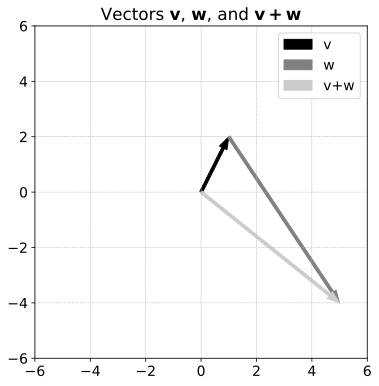

In [3]:
v= np.array([1,2])
w= np.array([4,-6])

vPlusw= v+w

plt.figure(figsize=(6,6))

a1= plt.arrow(
    0,0,
    v[0],v[1],
    head_width=.3,
    width=.1,
    color='k',
    length_includes_head=True
)
a2= plt.arrow(
    v[0],v[1],
    w[0],w[1],
    head_width=.3,
    width=.1,
    color=[.5,.5,.5],
    length_includes_head=True
)
a3= plt.arrow(
    0,0,
    vPlusw[0],vPlusw[1],
    head_width=.3,
    width=.1,
    color=[.8,.8,.8],
    length_includes_head=True
)

plt.grid(linestyle='--', linewidth=.5)
plt.axis('square')
plt.axis([-6,6,-6,6])
plt.legend([a1,a2,a3],['v','w','v+w'])
plt.title('Vectors $\mathbf{v}$, $\mathbf{w}$, and $\mathbf{v+w}$')
plt.show

**SUMMARY**

Vector addoton is pretty streight forward:  

- Algebraicly  
$
  v + w = \begin{bmatrix} 1 + 4 \\ 2 + (-6) \end{bmatrix} = \begin{bmatrix} 5 \\ -4 \end{bmatrix}
$
- Geometricaly  
put tail of second vector to the head of first and draw line


#### 2-3 Unit Norm vector

Norm is the magnitude or in a geometrical sence it is mean length. Which is the distance from tail to head and it is computed using standard Euclidian distance formula

$
    ||v|| = \sqrt{\sum_{i=1}^{n} v_i^2}
$

Unit vector is the product of reciprocal of the vector norm and vector it self  
$
    \hat{v}= v (\frac{1}{||v||}) = \frac{v}{||v||}
$

In [4]:
def normOfVect(v):
    return np.sqrt(np.sum(v**2))

# Test on unit-norm vector
w1= np.array([0,0,1])
print(normOfVect(w1))

# non unit-norm vector
w2= np.array([1,2,3])
print(normOfVect(w2), np.linalg.norm(w2))

1.0
3.7416573867739413 3.7416573867739413


In [5]:
def createUnitVector(v):    
    mu= np.linalg.norm(v)
    return v / mu

w= np.array([0,1,0])
print(createUnitVector(w))

w= np.array([0,3,0])
print(createUnitVector(w))

w= np.array([13,-5,7])
print(createUnitVector(w))

createUnitVector(np.zeros((4,1)) )

[0. 1. 0.]
[0. 1. 0.]
[ 0.83395039 -0.32075015  0.44905021]


/tmp/ipykernel_557/1160802533.py:3: RuntimeWarning:

invalid value encountered in divide



array([[nan],
       [nan],
       [nan],
       [nan]])

#### 2-4 Scale vector

In [6]:
def createMagVec(v, mag):
    '''
    First calculates vector norm, then multiplies unit vectoe reciprocal on to the magnite.
    This all to create a scaled vector which is lies in same direction as original
    '''
    mu= np.linalg.norm(v)
    return mag * (v / mu)

w= np.array([1,0,0])
mw= createMagVec(w,4)
print(mw)

print(np.linalg.norm(w), np.linalg.norm(mw))

[4. 0. 0.]
1.0 4.0


#### 2-5 Transposing a row vector into a column vector

A matrix has rows(i) and columns(j) therfore each element in matrix has a row,columns index [i,j]. The transpose (T) operation is simply swaps i,j indices:  
$
m^T_{i,j} = m_{j,i}
$

In [7]:
row_v= np.array([[1,2,3]])
col_v= np.zeros((3,1))
col_vT= np.zeros((3,1))

for i in range(row_v.shape[1]):
    col_vT[i,0] = row_v[0,i]

print(f'Row vector:\n {row_v}')
print(f'Col vector:\n {col_v}')
print(f'Transposed vector:\n {col_vT}')

Row vector:
 [[1 2 3]]
Col vector:
 [[0.]
 [0.]
 [0.]]
Transposed vector:
 [[1.]
 [2.]
 [3.]]


#### 2-6 Compute vecvor's squred norm by dot product



**Math. Formula for the squared Euclidean norm:**
$
\|\mathbf{v}\|^2 = \sum_{i=1}^n v_i^2
$

and here is the formula for dot product of vector by it self  
$
\mathbf{v} \cdot \mathbf{v} = \sum_{i=1}^n v_i v_i = \sum_{i=1}^n v_i^2
$

**Geometric formula for squared norm**  
$
\mathbf{v} \cdot \mathbf{u} = \|\mathbf{v}\| \|\mathbf{u}\| \cos \theta
$  

thus when 2 vectors are equal  
$
\mathbf{v} \cdot \mathbf{v} = \|\mathbf{v}\| \|\mathbf{v}\| \cdot 1 = \|\mathbf{v}\|^2
$

In [8]:
random_v= np.random.rand(5)

# squared morm as a dot product with it self
norm_sqr1= np.dot(random_v, random_v)
norm_sqr2= normOfVect(random_v)**2
norm_sqr3= random_v @ random_v

print(f'norm_sqr1:{norm_sqr1}')
print(f'norm_sqr2:{norm_sqr2}')
print(f'norm_sqr3:{norm_sqr3}')

norm_sqr1:2.7037185124837837
norm_sqr2:2.7037185124837837
norm_sqr3:2.7037185124837837


#### 2-7 Commutatuve property of a vectors dot product

$
\mathbf{a}^T \mathbf{b} = \mathbf{b}^T \mathbf{a}
$

In [9]:
# Vector dimensionality
v_dim=11

a= np.random.rand(v_dim,1)
b= np.random.rand(v_dim,1)

aTb= np.sum(a * b)
bTa= b.T @ a

print(f'aTb - bTa={aTb-bTa}')

aTb - bTa=[[0.]]


#### 2-8 Code that repeates

<img src="./images/fig_2-6.png" width="150" />

The goal is to find the point on a that is as close as possible to the head of b
**Algorythm**
1. Find scale factor $\beta$ for vector 'a' such that lenght of $\beta \text{a} = \text{b}$. The point $\beta$ is othogonal to the vector b. Another words:  
$\text{a}*(\text{b}-\beta\text{b})=0$  
$\text{a}*\text{b} -\beta (\text{a}*\text{a})=0$  
$\beta(\text{a}*\text{a}) = \text{a}*\text{b} | / (\text{a}*\text{a})$  
$\beta=\frac{\text{a}*\text{b}}{\text{a}*\text{a}}$

2. Compute projection point $\beta$

In [10]:
vec_a= np.array([1,2])
vec_b= np.array([1.5,.5])

# compute beta
beta_scalar= (vec_a @ vec_b) / (vec_a @ vec_a)

# compute projection point
projection_point = (vec_b - (beta_scalar*vec_a))


#### 2-9 Orthogonal vector decomposition
<img src="./images/fig_2-7.png" width="200" />
Orthogonal vector decomposition is the process of breaking a vector into two components:  

- $t \parallel r $ t parallel to a given vector 'r' (or subspace). The paralel vector is any scaled version of vector r
- $t \perp r$ perpendicular (orthogonal) to the same vector 'r' (or subspace).

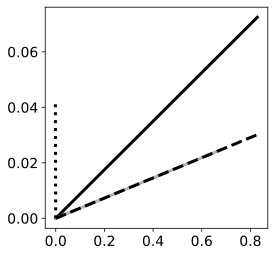

In [11]:
vec_t= np.random.rand(2)
vec_r= np.random.rand(2)

t_parallel_r= vec_r * ((vec_t @ vec_r) / (vec_r @ vec_r))
t_perpend_r = vec_t - t_parallel_r

plt.figure(figsize=(4,4));

# Main vectors
plt.plot([0,vec_t[0]],[0,vec_t[1]], color='k', linewidth=3,label=r'$\mathbf{t}$')
plt.plot([0,vec_r[0]],[0,vec_r[1]], color=[.7,.7,.7], linewidth=3,label=r'$\mathbf{r}$')

# Decomposed vectors
plt.plot([0,t_parallel_r[0]],[0,t_parallel_r[1]], 'k--', linewidth=3,label=r'$\mathbf{t}$')
plt.plot([0,t_perpend_r[0]],[0,t_perpend_r[1]], 'k:', linewidth=3,label=r'$\mathbf{t}$')


#### 2-10 Made up bug

In [12]:
t_paralle_r= vec_r * ((vec_t @ vec_r) / (vec_t @ vec_t))

### Chapter 3

#### 3-1 Linear weighted combinantion

In [13]:
# Scalars
lambda1= 1
lambda2= 2
lambda3= -3

# Vectors
v1= np.array([4,5,1])
v2= np.array([-4,0,-4])
v3= np.array([1,3,2])

# Linear weighted combination
lwc = lambda1*v1 + lambda2*v2 + lambda3*v3

print(lwc)

# Organize scalars list
scalars= [lambda1, lambda2, lambda3]
vectors= [v1, v2, v3]

# Linear weighte combination via zip
for s,v in zip(scalars, vectors):
    linCombo += s*v
print(linCombo)

[ -7  -4 -13]


NameError: name 'linCombo' is not defined

#### 3-3 Draw a random points in subspace

In [ ]:
# The vector set containing just one vector
A= np.array([1,3])

# x-axix range
xlim= [-4,4]

# random scalars from xlim space
scalars= np.random.uniform(low=xlim[0], high=xlim[1], size=100)

plt.figure(figsize=(6,6))
for s in scalars:
    # crete point p
    p= A*s
    plt.plot(p[0],p[1],'ko')

plt.xlim(xlim)
plt.ylim(xlim)
plt.grid()
plt.text(-4.5, 4.5, 'A)', fontweight='bold', fontsize=18)



In [ ]:

pio.renderers.default = 'notebook'
v1= np.array([3,5,1])
v2= np.array([0,2,2])
trDPoints= np.zeros((100,3))
scalars= np.random.uniform(low=xlim[0], high=xlim[1], size=(100,2))
for i in range(len(scalars)):
    trDPoints[i,:]= v1*scalars[i,0] + v2*scalars[i,1]

fig=go.Figure(data=[go.Scatter3d(x=trDPoints[:,0], 
                                 y=trDPoints[:,1], 
                                 z=trDPoints[:,2], 
                                 mode='markers', 
                                 marker=dict(size=6,color='black') )]);
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
plt.savefig('Figure_03_07b.png',dpi=300)
fig.show()

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Определяем символы
s1, s2 = sp.symbols('s1 s2')

# Векторы
v1 = sp.Matrix([3, 5, 1])
v2 = sp.Matrix([0, 2, 2])

# Линейная комбинация
point = s1 * v1 + s2 * v2

# Численные значения для границ
xlim = [-1, 1]

# Генерация случайных скаляров
scalars = np.random.uniform(low=xlim[0], high=xlim[1], size=(100, 2))

# Вычисление точек в численном виде
trDPoints = []
for s1_val, s2_val in scalars:
    numeric_point = point.subs({s1: s1_val, s2: s2_val})  # Подстановка значений
    trDPoints.append([float(numeric_point[0]), float(numeric_point[1]), float(numeric_point[2])])

# Конвертация в numpy-массив
trDPoints = np.array(trDPoints)

# Построение 3D-графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trDPoints[:, 0], trDPoints[:, 1], trDPoints[:, 2], c='black', s=10)

# Настройка осей
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()


### Chapter 4

#### 4-1 Compute Pearson and Cos corelations

1. Cosone Similarity  
$
\cos(\theta_{x,y}) = \frac{\alpha}{\|x\| \|y\|}
$

Where:
- $\alpha$: The **dot product** of the vectors  x and y.
- $ \|x\| = \sqrt{\sum_{i=1}^n x_i^2}$: The **magnitude** (Euclidean norm) of vector x.
- $ \|y\| = \sqrt{\sum_{i=1}^n y_i^2}$: The **magnitude** (Euclidean norm) of vector y.

**Interpretation**
- $ \cos(\theta_{x,y})$ = 1:  Perfect alignment (same direction).
- $ \cos(\theta_{x,y})$ = 0:  Orthogonal (no similarity).
- $ \cos(\theta_{x,y})$ = -1: Perfectly opposite directions

2. Pearson Correlation Coeffisient  
$
\rho = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}
$

Where:
- $x_i, y_i$: Individual data points of variables x  and y.
- $\bar{x}, \bar{y}$: Mean values of x and y.

**Linear Algebra Notation**

$
\rho = \frac{\tilde{x}^T \tilde{y}}{\|\tilde{x}\| \|\tilde{y}\|}
$
Where:
- $\tilde{x}^T \tilde{y}$: The **dot product** of the mean-centered vectors $\tilde{x}$ and $\tilde{y}$.
- $\|\tilde{x}\|, \|\tilde{y}\|$: The Euclidean norms of the mean-centered vectors.



In [ ]:
def compute_cos_and_pearson_cor_coefs(x,y):
    # Compute cosine similarity value
    csv_alpha= np.dot(x,y)
    csv_denominator= np.linalg.norm(x) * np.linalg.norm(y)
    csv= csv_alpha / csv_denominator

    # Compute Pearson Corelation coeficient
    x_centered= x - np.mean(x)
    y_centered= y - np.mean(y)
    pcc_numerator= np.dot(x_centered,y_centered)
    pcc_denominator= np.linalg.norm(x_centered) * np.linalg.norm(y_centered)
    pcc= pcc_numerator / pcc_denominator

    return (csv, pcc)

a= np.random.randn(15)
b= np.random.randn(15)

res= compute_cos_and_pearson_cor_coefs(a,b)
print(f'Cos:{res[0]} Pearson:{res[1]}, NumPy:{np.corrcoef(a,b)[0,1]}')

#### 4-2

In [ ]:
a= np.arange(4,dtype='float32')
offsets= np.arange(-50,51)

results= np.zeros((len(offsets),2))

for i in range(len(offsets)):
    results[i,:]= compute_cos_and_pearson_cor_coefs(a, a+offsets[i])

plt.figure(figsize=(8,4))
h=plt.plot(offsets,results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([.7,.7,.7])
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Pearson','Cosine sim.'])
plt.show()


Pearson Correlation (PCC):
- Sensitive to differences in means (i.e., offsets). It captures the relative positioning of the values after mean-centering.
- Correlation decreases as the offset increases since centering removes the shared pattern.

Cosine Similarity:
- Insensitive to offsets. It only considers the direction of vectors, ignoring mean differences.
- It stays constant at 1.0 because the angular similarity between a and a + offset does not change after normalization.

#### 4-3 Source code

In [ ]:
# import the function
from scipy.stats import pearsonr

# inspect the source code
??pearsonr

#### 4-4 Performance check

In [ ]:
# a bare bones Pearson corr function
def compute_pearson_cor_coef(x,y):
    # Compute Pearson Corelation coeficient
    x_centered= x - np.mean(x)
    y_centered= y - np.mean(y)
    pcc_numerator= np.dot(x_centered,y_centered)
    pcc_denominator= np.linalg.norm(x_centered) * np.linalg.norm(y_centered)
    
    return pcc_numerator / pcc_denominator

numIters= 1000
varLength= 500

# clock custom-written func
tic= time.time()
for i in range(numIters):
    x= np.random.randn(varLength,2)
    compute_pearson_cor_coef(x[:,0],x[:,1])
t1= time.time() - tic

# clock numpy built-in func
tic= time.time()
for i in range(numIters):
    x=np.random.randn(varLength,2)
    pearsonr(x[:,0], x[:,1])
t2= time.time() - tic

print(f'Custom func speed:{t1 * 1000:.2f} ms')
print(f'Built-in func speed:{t2 * 1000:.2f} ms')

#### 4-5 Edge detection

In [ ]:
kernel= np.array([-1,1])

signal= np.zeros(30)
signal[10:20]= 1

_, axs= plt.subplots(1,2, figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('kernel')
axs[0].set_xlim([-15,15])

axs[1].plot(signal,'ks-')
axs[1].set_title('Time series signal')
plt.show()

In [ ]:
# init feature map
featureMap= np.zeros(len(signal))

# loop over the signal and do templeate matching (via dot prod)
for t in range(1, len(signal) -1):
    featureMap[t]= np.dot(kernel, signal[t-1:t+1])

_, axs= plt.subplots(1,2, figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('kernel')
axs[0].set_xlim([-15,15])

axs[1].plot(signal, 'ks-', label='Signal', linewidth=3)
markers,stemlines,_= axs[1].stem(range(len(featureMap)), featureMap, basefmt=' ',linefmt='', markerfmt='o', label='Edge Detection')

plt.setp(stemlines, 'color',[.7,.7,.7])
plt.setp(markers, 'color', [.7,.7,.7])
axs[1].legend()
plt.show()

#### 4-6 low-pass filtering

In [ ]:
# define the kernel (a sorta-kinda Gaussian)
kernel = np.array([0,.1,.3,.8,1,.8,.3,.1,0])
kernel = kernel / np.sum(kernel)

# and the signal
Nsignal = 100
timeseries = np.random.randn(Nsignal)


# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'ks-')
axs[1].set_title('Time series signal')

plt.show()

In [ ]:
# some handy length parameters
Nkernel = len(kernel)
halfKrn = Nkernel//2

# make a copy of the signal for filtering
filtsig = timeseries.copy()

# loop over the signal time points
for t in range(halfKrn+1,Nsignal-halfKrn):
  filtsig[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])


# and plot
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,color='k',label='Original',linewidth=1)
axs[1].plot(filtsig,'--',color=[.6,.6,.6],label='Smoothed',linewidth=2)
axs[1].legend()


plt.show()

#### 4-7 High-pass filter

In [ ]:
# define the kernel (a sorta-kinda Gaussian)
kernel = np.array([0,.1,.3,.8,-1,.8,.3,.1,0])
kernel /= np.sum(kernel)
kernel -= np.mean(kernel)

# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'s-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'s-')
axs[1].set_title('Time series signal')
plt.show()



# loop over the signal time points
filtsig2 = timeseries.copy()
for t in range(halfKrn+1,Nsignal-halfKrn):
  filtsig2[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])

plt.plot(timeseries,color='k',label='Original',linewidth=1)
plt.plot(filtsig2,color=[.9,.2,.7],label='Sharpened',linewidth=1)
plt.legend()
plt.show()

#### 4-8 k-Means



In [ ]:
# NOTE Max tiy understood this code well by 11-23-2024
nPerCluster= 50

# blur around centroid
blur=1

# XY Centroid locayions
A=[1,1]
B=[-3,1]
C=[3,3]

# create three clusters (A, B, C) centered at specific 2D locations with Gaussian noise (blur) around the centroids.
a= [ A[0] + np.random.randn(nPerCluster) * blur, A[1] + np.random.randn(nPerCluster) * blur]
b= [ B[0] + np.random.randn(nPerCluster) * blur, B[1] + np.random.randn(nPerCluster) * blur]
c= [ C[0] + np.random.randn(nPerCluster) * blur, C[1] + np.random.randn(nPerCluster) * blur]

# Combine clusters into a single dataset data, where each row represents a 2D point.
data= np.transpose( np.concatenate((a,b,c), axis=1))

# plot data
plt.plot(data[:,0], data[:,1], 'ko', markerfacecolor='w')
plt.title('Raw pre-clustered data')
plt.xticks([])
plt.yticks([])

plt.show()

In [ ]:
# Initrandom cluster centroids
k=3

# Random initial centroids. Select by sampling k random points from the dataset:
rdix=np.random.choice(range(len(data)),k,replace=False)
centroids= data[rdix,:]

# setup the figure
fig, axs= plt.subplots(2,2, figsize=(6,6))
axs= axs.flatten()
lineColors= [[0,0,0],[.4,.4,.4],[.8,.8,.8]] #rbm

# plot the data with initial random cluster ccentroids
axs[0].plot(data[:,0], data[:,1], 'ko', markerfacecolor='w')
axs[0].plot(centroids[:,0], centroids[:,1], 'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])

# loop over iterations
for iteri in range(3):
    # 1. Compute distances.
    #    The dists matrix is of shape (number of data points, number of clusters) (i.e., dists.shape == (n, k)).
    dists= np.zeros((data.shape[0],k))

    for ci in range(k):
        # For each data point, compute the squared Euclidean distance to all centroids. 
        # This results in a (number of points x k) distance matrix.     
        # distance=(data[0]−cx)2+(data[1]−cy)2
        dists[:,ci]= np.sum((data - centroids[ci,:])**2, axis=1)

    # 2. assign to group based on minimum diisinstance
    #    Assign each point to the cluster corresponding to the nearest centroid (smallest distance).
    groupidx= np.argmin(dists, axis=1)

    # 3. recompite centers
    #    For each cluster, update the centroid as the mean of all points assigned to it.
    for ki in range(k):
        centroids[ki,:]= [np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1])]

    # plot datapoints
    for i in range(len(data)):
        axs[iteri + 1].plot([data[i,0], centroids[groupidx[i],0]], [data[i,1], centroids[groupidx[i],1]], color=lineColors[groupidx[i]])

    axs[iteri+1].plot(centroids[:,0], centroids[:,1], 'ko')
    axs[iteri+1].set_title(f'Iteration {iteri+1}')
    axs[iteri+1].set_xticks([])
    axs[iteri+1].set_yticks([])

plt.show()

### Chapter 5

#### 5-1 Matrix Indexing

In [ ]:
A= np.arange(12).reshape(3,4)
print(A)

row_element_index= 1 
col_element_index= 3

print(f'The matrix element at index ({row_element_index +1},{col_element_index +1}) is {A[row_element_index,col_element_index]}')

#### 5-2 Matrix slicing

In [ ]:
C= np.arange(100).reshape((10,10))

# sub matrix
C_1= C[0:5:1,0:5:1]
print(C)
print(C_1)

fig, ax= plt.subplots(1,2)
ax[0].imshow(C, cmap='gray', origin='upper', vmin=0,vmax=np.max(C))
ax[0].plot([4.5,4.5],[-.5,9.5],'w--')
ax[0].plot([-.5,9.5],[4.5,4.5],'w--')
ax[0].set_title('Original matrix')
# text labels
for (j,i),num in np.ndenumerate(C):
    ax[0].text(i,j,num, color=[.8,.8,.8],ha='center', va='center')

ax[1].imshow(C_1, cmap='gray', origin='upper', vmin=0, vmax=np.max(C))
ax[1].set_title('SubMatrix')

for (i,j),num in np.ndenumerate(C_1):
    ax[1].text(i,j,num, color=[.8,.8,.8],ha='center',va='center')

plt.show()


#### 5-3 Matrix from submatrix

In [ ]:
C_1= C[0:5:1,0:5:1]
C_2= C[0:5:1,5:10:1]
C_3= C[5:10:1,0:5:1]
C_4= C[5:10:1,5:10:1]

#rearrange matrix
newMatrix= np.vstack(
    (
        np.hstack((C_4,C_3)),
        np.hstack((C_2,C_1))
    )
)

fig, ax=plt.subplots(1,2,figsize=(10,5))

ax[0].imshow(C,cmap='gray', origin='upper', vmin=0,vmax=np.max(C))
ax[0].plot([4.5,4.5],[-.5,9.5],'w--')
ax[0].plot([-.5,9.5],[4.5,4.5],'w--')
ax[0].set_title('Original Matrix')

for (i,j), num in np.ndenumerate(C):
    ax[0].text(i,j,num,color=[.8,.8,.8], ha='center', va='center')

ax[1].imshow(newMatrix,cmap='gray',origin='upper', vmin=0,vmax=np.max(C))
ax[1].plot([4.5,4.5],[-.5,9.5],'w--')
ax[1].plot([-.5,9.5],[4.5,4.5],'w--')
ax[1].set_title('New Matrix')

for (i,j), num in np.ndenumerate(newMatrix):
    ax[1].text(i,j,num,color=[.8,.8,.8], ha='center', va='center')

plt.show()

#### 5-4 Matrix addition

In [ ]:
def add_matrices(A,B):
    # check that both matrices have same size
    if A.shape != B.shape:
        raise('Matrices must be the same size.')

    C= np.zeros(A.shape)

    # Element wise summation
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            C[i,j]= A[i,j] + B[i,j]

    return C

M1= np.random.randn(6,4)
M2= np.random.randn(6,4)

print(f'M3={add_matrices(M1,M2)}')

5-5 Matrix Commutatuvuty and Distributivity

In [ ]:
A= np.random.randn(3,4)
B= np.random.randn(3,4)
sigma= np.random.randn()

expr1= sigma*(A + B)
expr2= sigma*A + sigma*B
expr3= A*sigma + B*sigma

#as a logick for test we take an asumption that expr1 = expr2 = expr3, if so then 2*expr1 -expr2 - expr3 = 0
print(np.round(2*expr1-expr2-expr3,8))

#### 5-6 Code matrix multiplication

matrix multiplication is valid when the number of columns in the left matrix equals the number of rows in the right matrix, and the size of the product matrix is defined by the number of rows in the left matrix and the number of columns in the right matrix.

<img src="./images/matrix_mult.png" width="150" />

In [19]:
m = 6  # num of rows in A
n = 5  # num of cols in A, and rows in B
k = 6  # num of cols in B

A= np.random.randn(m,n)
B= np.random.randn(n,k)
C1= np.zeros((m,k))

# build the product matrix element-wise
for row_i in range(m):
    for col_j in range(k):
        C1[row_i, col_j]=np.dot(A[row_i,:],B[:,col_j])

# diret matrix multiplication
C2=A@B

# compare results
np.isclose(C1,C2)


array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

#### 5-7 LIVE EVIL

$
(L \cdot I \cdot V \cdot E)^T = E^T \cdot V^T \cdot I^T \cdot L^T
$
the rule is that the transpose of multiplied matrices is the same as the individual matrices transposed and multiplied, but reversed in order

In [21]:
L= np.random.randn(2,6)
I= np.random.randn(6,3)
V= np.random.randn(3,5)
E= np.random.randn(5,2)

res1=(L@I@V@E).T
res2=E.T@V.T@I.T@L.T

print(np.allclose(res1,res2))

True


#### 5-8 Symetric Matrices

corresponding rows and columns are equal. And that means that when you swap the rows and columns , nothing happens to the matrix. And that in turn means that a symmetric matrix equals its transposeю
Symetric matrices are symetric around main diagonal


In [28]:
def is_symetric(M):
    # Difference between matrix and its Transpose
    D= M - M.T

    # Ccheck if SSE (sum of squared errors) is smaller then threshold
    sse= np.sum(D**2)

    # if SSE in tiny return true, else matrix is asymetric
    return sse < 10**-15

A= np.random.randn(4,4)
AtA= A.T@A

print(A,end='\n')
print(' ')
print(AtA)
print(is_symetric(A), end='\n')

print(is_symetric(AtA))

[[ 2.65412546 -0.84432148  0.920608    0.86490613]
 [ 0.56290328 -0.45150442 -0.07019004 -0.75234987]
 [-0.40424578 -0.33161968  0.36904274  0.90046118]
 [-0.66086628 -0.45084886 -0.86978967 -0.907507  ]]
 
[[ 7.96140093 -2.06308179  2.82952962  2.1078023 ]
 [-2.06308179  1.22997131 -0.47583614 -0.28003167]
 [ 2.82952962 -0.47583614  1.74517235  1.97069584]
 [ 2.1078023  -0.28003167  1.97069584  2.94849222]]
False
True


#### 5-9  Symetry from non Symetric

In [30]:
# create symmetric and nonsymmetric matrices
A = np.random.randn(4,4)
AtA = (A + A.T) / 2 # additive method!

# test!
print(is_symetric(A))
print(is_symetric(AtA))

False
True


#### 5-10 Vector matrix mult

In [34]:
A= np.array(
    [[3,0],
     [5,2],
     [1,2]]
)

xlim= [-4,4]
scalars= np.random.uniform(low=xlim[0], high=xlim[1],size=(100,2))

# create random points
points= np.zeros((100,3))
for i in range(len(scalars)):
    points[i,:]= A@scalars[i]

fig= go.Figure(data=[go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode='markers')])
#fig.show()

#### 5-11 Diagonal Matrices

In [35]:
m=4
n=4

# A matrix of all ones
O= np.ones((m,n))
# A diaganal matrix where diagonal elements are 1,4,9
D= np.diag(np.arange(1,n+1)**2)
# A diagonal matrix equal to square root of matrix above
S= np.sqrt(D)

pre= D@O
pst= O@D
both= S@O@S

print('Ones matrix')
print(O), print(' ')

print('Diagonal matrix')
print(D), print(' ')

print('Square matrix')
print(S), print(' ')

print('Pre-multiply by diagonal')
print(pre), print(' ')

print('Post-multiply by diagonal')
print(pst), print(' ')

print('Pre and post multiply by sqrt diagonal')
print(both)

Ones matrix
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
 
Diagonal matrix
[[ 1  0  0  0]
 [ 0  4  0  0]
 [ 0  0  9  0]
 [ 0  0  0 16]]
 
Square matrix
[[1. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 4.]]
 
Pre-multiply by diagonal
[[ 1.  1.  1.  1.]
 [ 4.  4.  4.  4.]
 [ 9.  9.  9.  9.]
 [16. 16. 16. 16.]]
 
Post-multiply by diagonal
[[ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]]
 
Pre and post multiply by sqrt diagonal
[[ 1.  2.  3.  4.]
 [ 2.  4.  6.  8.]
 [ 3.  6.  9. 12.]
 [ 4.  8. 12. 16.]]


#### 5-12 Hadamard mult

- Scalar-matrix multiplication means to multiply each element in the matrix bythe same scalar.
- Hadamard multiplication involves multiplying two matrices element-wise (hence the alternative terminology element-wise multiplication). np.multiply() or *
- standard matrix multiplication (next section) is indicated using an @ symbol

In [38]:
N=5
D1=np.diag(np.random.randn(N))
D2=np.diag(np.random.randn(N))

hadamard= D1*D2
standard= D1@D2

print(hadamard), print(' ')
print(standard), print(' ')

print(np.isclose(hadamard, standard))

[[0.22697215 0.         0.         0.         0.        ]
 [0.         0.07793256 0.         0.         0.        ]
 [0.         0.         0.1277397  0.         0.        ]
 [0.         0.         0.         0.62560238 0.        ]
 [0.         0.         0.         0.         1.67639875]]
 
[[0.22697215 0.         0.         0.         0.        ]
 [0.         0.07793256 0.         0.         0.        ]
 [0.         0.         0.1277397  0.         0.        ]
 [0.         0.         0.         0.62560238 0.        ]
 [0.         0.         0.         0.         1.67639875]]
 
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


## Chapter 6

### 6-1 Frobenius norm(i.e. regularizatopm)

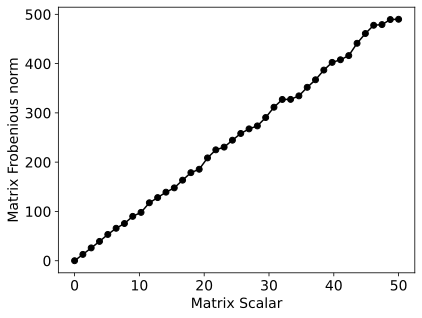

In [4]:
# experiment simulations
scalingVals= np.linspace(0,50,40)
nExperiments= 10

# initialize outputs
matrixNorms= np.zeros((len(scalingVals), nExperiments))

# run experiment
for si in range(len(scalingVals)):
    for expi in range(nExperiments):

        # generate random scaled matrix
        R= np.random.randn(10,10) * scalingVals[si]
        
        # store its norm
        matrixNorms[si,expi]= np.linalg.norm(R, 'fro')

fig, ax= plt.subplots()
ax.plot(scalingVals, np.mean(matrixNorms, axis=1), 'ko-')
ax.set_xlabel('Matrix Scalar')
ax.set_ylabel('Matrix Frobenious norm')

plt.show()

**INTERIM CONCLUSION**

$\|R\|_F = \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n} |R_{ij}|^2}$

- Linear Relationship:
  - The Frobenius norm grows linearly with the scaling factor.
  - This is because the Frobenius norm is proportional to the scale of the matrix:
  - ∥αA∥F=∣α∣⋅∥A∥F where αα is the scaling factor and AA is the matrix. Since ∣α∣∣α∣ increases linearly, the norm increases linearly.

- Non-Negativity:
  - The norm values are strictly nonnegative (≥ 0), as shown in the plot. This is a fundamental property of matrix norms.
  - Even for small scaling factors, the norm never goes below 0.

- Zero Norm:
  - The norm equals 0 only for the zero matrix. In the plot, the norm is zero only when the scaling factor is 0, making the matrix a zero matrix.

### 6-2 Find a scalar that brings a Frobeniuis distance between 2 matrices to 1

**Reminder**  
The Frobenius distance (or Frobenius norm) between two matrices is a measure of the "difference" between them. It is computed as the square root of the sum of the squares of the differences between corresponding entries in the two matrices. pls. see more info in Glassary


In [9]:
def calc_euclidean_dist(M1: Union[np.ndarray, np.matrix], M2: Union[np.array, np.matrix]):
    '''
    Calculates the Eucledian(Frobenious) distance between the given matrices

    Args:
        M1 (Union[np.array, np.matrix]): First matrix. Could be in a form either NumPy array or Matrix
        M2 same as M1

    Returns:
        float: The Eucledian distance between given matrices
    '''
    # Matrix diff
    D= M1 - M2

    # Matrix dist
    return np.sqrt(np.sum(D**2))
    

In [12]:
m_dim= 7

A= np.random.randn(m_dim, m_dim)
B= np.random.randn(m_dim, m_dim)

n_iter= 0
scalar= 1

while True:
    if calc_euclidean_dist( (scalar * A), (scalar * B) ) <= 1:
        break
        
    scalar *= .9
    n_iter += 1

print(f'Number of iterations: {n_iter}', end='\n')
print(f'Scalar: {scalar:.3f}')

# The output result is throught f-string format specificator :.2f
print(f'Eucledian distance: {calc_euclidean_dist(scalar * A, scalar * B):.2f}')


Number of iterations: 20
Scalar: 0.122
Eucledian distance: 0.93


### 6-3 Compoare Matrix Trace vs Frobenious norm
- The trace of a matrix is the sum of its diagonal elements, indicated as tr(A), and exists only for square matrices.
- Matrix Trace $A(tr)$ is defined by the dot product of each row with itself $A^T A$.
- Eucledian norm = $\|A\|_F = \sqrt{\sum_{i=1}^{M} \sum_{j=1}^{N} a_{ij}^2} = \sqrt{\mathrm{tr}(A^T A)}$

In [15]:
m_dim= 50
A= np.random.randn(m_dim, m_dim)

# Method 1. Calculate Matrix trace
#           The trace formula computes the Frobenius norm using the fact that the diagonal elements of 
#           ATA matrix are the sums of squares of the elements of matrix A.
m_tr= np.sqrt(np.sum(np.diag(A.T@A)))

# Method 2. Eucledian norm
#           The Euclidean method directly computes the sum of squares of the elements of the matrix A. 
m_ec= np.sqrt(np.sum(A**2))

# If the two methods are implemented correctly, the difference between the results should be close to zero.
print(f'Result: {m_tr - m_ec:.1f}')

Result: -0.0


### 6-4 Shift and Calc frob and corr

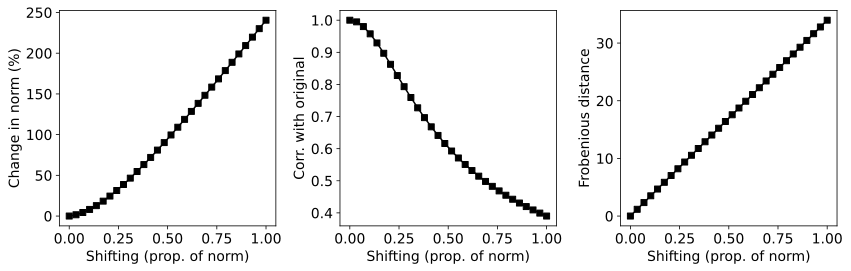

In [19]:
m_dim= 10
# generate a NumPy array with 30 equally spaced values ranging from 0 to 1, inclusive of both endpoints.
shifting= np.linspace(0,1,30)

A= np.random.randn(m_dim, m_dim)
norm_A= np.linalg.norm(A, 'fro')

# Init resulting matrices
shifting_results= np.zeros((len(shifting),3))
results_names= ['Change in norm (%)', 'Corr. with original', 'Frobenious distance']

for si in range(len(shifting)):
    #shift the matrix
    # np.eye(N) creates an N×N identity matrix. An identity matrix has 1s along its diagonal and 0s elsewhere
    # The result of shifting[si] * norm_A * np.eye(N) is a diagonal matrix where 
    #            each diagonal element equals shifting[si] * norm_A
    # The operation shifts A along its diagonal. Effectively, this increases (or decreases) the diagonal elements of 
    #             A proportionally to shifting[si] * norm_A
    A_shifted= A + shifting[si] * norm_A * np.eye(m_dim)

    # Calc new norm and % of change
    norm_A_shifted= np.linalg.norm(A_shifted, 'fro')
    shifting_results[si,0]= 100 * (norm_A_shifted - norm_A) / norm_A

    # Compute corelation
    shifting_results[si,1]= np.corrcoef(A.flatten(), A_shifted.flatten())[0,1]

    # Frob distance
    shifting_results[si,2]= calc_euclidean_dist(A, A_shifted)

_, ax= plt.subplots(1,3, figsize=(12,4))

for i in range(3):
    ax[i].plot(shifting,shifting_results[:,i], 'ks-')
    ax[i].set_xlabel('Shifting (prop. of norm)')
    ax[i].set_ylabel(results_names[i])

plt.tight_layout()
plt.show()



**INTERIM CONCLUSIONS**

1. Change in Norm (%)
- The y-axis represents the percentage change in the Frobenius norm of the matrix after shifting.
- The x-axis represents the shifting factor, which is a proportion of the original norm.
- Interpretation:
  - The change in norm increases quadratically as the shifting factor increases.
  - This behavior is expected because the Frobenius norm grows as the diagonal elements (scaled by shifting×normAshifting×normA​) increase.
  - At a shifting factor of 1 (maximum shift), the norm increases by approximately 250%.

2. Correlation of the shifted matrix with thr original Matrix
- The y-axis represents the correlation coefficient (R) between the original matrix A and the shifted matrix A_shifted.
- The x-axis represents the shifting factor.
- Interpretation:
  - The correlation decreases as the shifting factor increases.
  - This suggests that the diagonal shift increasingly distorts the structure of the original matrix, reducing the similarity between A and A_shifted.
  - However, even with a maximum shift, the correlation remains above 0.4, indicating some residual similarity.

3. Frobenius Distance
- The y-axis represents the Frobenius distance between A and A_shifted.
- The x-axis represents the shifting factor.
- Interpretation:
  - The distance grows linearly as the shifting factor increases.
  - This is expected because the diagonal shift scales proportionally to the shifting factor, which directly contributes to the Frobenius distance.
  - At a shifting factor of 1, the distance is maximized (approximately 30).

### 6-5 Random matrices with arbitrary rank

In [21]:
m_dim_1= 5
m_dim_2= 8
m_rank= 3

A= np.random.randn(m_dim, m_rank) @ np.random.randn(m_rank, m_dim_2)

print(f'Matrix shape: {A.shape}')
print(f'Matrix rank: {np.linalg.matrix_rank(A)}')
print(f'Matrix: {A}')

Matrix shape: (10, 8)
Matrix rank: 3
Matrix: [[ 1.27243169e+00 -2.29448349e+00  4.82826572e-02 -5.69564372e-01
  -1.08038362e+00 -9.27717259e-01  7.37357456e-01  9.78225558e-01]
 [ 1.38354243e+00 -2.49102947e+00 -8.79054353e-01 -6.19818042e-01
  -9.58092474e-01 -1.03095304e+00  4.19919342e-01 -8.80154069e-02]
 [-1.27610386e+00  4.60120347e-01 -3.62151526e-01 -7.50783800e-01
   3.74024410e-01  2.08527821e-01  2.78420765e-01 -1.47392614e+00]
 [-8.98310171e-01  2.18907064e+00 -7.22624292e-02  8.10374494e-01
   1.01329172e+00  8.74702926e-01 -8.90347364e-01 -7.05363441e-01]
 [-2.60460450e+00  2.25461234e+00  1.86054933e+00 -5.79466415e-01
   7.22061542e-01  1.00187694e+00  8.08566980e-01  2.81211092e-01]
 [ 5.72686811e-02 -1.62538878e-01 -1.65119460e-01 -6.87450081e-02
  -3.51850161e-02 -6.89943888e-02  1.92827759e-03 -1.66211037e-01]
 [-2.36943480e+00  4.25277476e-01 -1.52108345e-01 -1.70006675e+00
   3.92153707e-01  2.34050599e-01  9.95927392e-01 -2.11781593e+00]
 [-3.95322768e-01  1.419

### 6-6 Matrix Ranks addition rule

$(r(A + B) ≤ r(A) + r(B))$

In [23]:
A= np.diag([1,0,0,0,0])
B= np.diag([-1,0,0,0,0])
C= A + B

print(f'Matrix A rank: {np.linalg.matrix_rank(A)}')
print(f'Matrix B rank: {np.linalg.matrix_rank(B)}')
print(f'Matrices A + B rank: {np.linalg.matrix_rank(C)}')

Matrix A rank: 1
Matrix B rank: 1
Matrices A + B rank: 0


### 6-7 Ranks heatmap

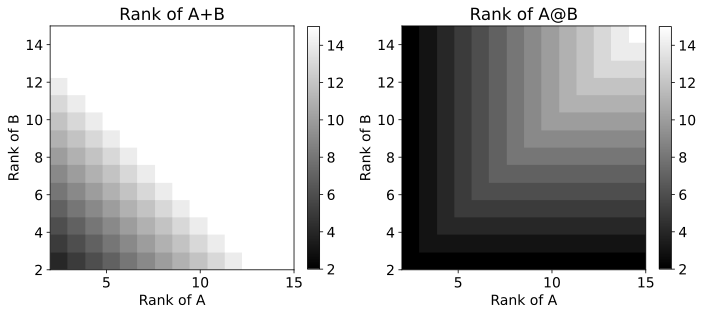

In [25]:
def create_matrix(m_dim, m_rank):
    return np.random.randn(m_dim, m_rank) @ np.random.randn(m_rank, m_dim)

m_dim= 20
rank_range= range(2,16)

rank_results= np.zeros((len(rank_range), len(rank_range),2))

for i in range(len(rank_range)):
    for j in range(len(rank_range)):
        M1= create_matrix(m_dim, rank_range[i]) + create_matrix(m_dim, rank_range[j])
        M2= create_matrix(m_dim, rank_range[i]) @ create_matrix(m_dim, rank_range[j])

        # Compute ranks
        rank_results[i,j,0]= np.linalg.matrix_rank(M1)
        rank_results[i,j,1]= np.linalg.matrix_rank(M2)

fig, ax= plt.subplots(1,2,figsize=(10,6))
s= '+@' # symbol for title

for i in range(2):
    h= ax[i].imshow(rank_results[:,:,i], 
                    vmin=np.min(rank_range), 
                    vmax=np.max(rank_range),
                    origin='lower',
                    extent=(
                        rank_range[0],
                        rank_range[-1],
                        rank_range[0],
                        rank_range[-1]
                    ),
                    cmap='gray'
                   )
    fig.colorbar(h, ax=ax[i], fraction=.045)
    ax[i].set_xlabel('Rank of A')
    ax[i].set_ylabel('Rank of B')
    ax[i].set_title(f'Rank of A{s[i]}B')

plt.tight_layout()
plt.show()

**INTERIM CONCLUSION**

Left Chart: Rank of $A+B$
- Brightness (color): The rank of the resulting matrix A+B.
- Explanation:
  - The rank of the sum of two matrices follows the rule: $rank(A+B)≤rank(A)+rank(B)$
  - The chart shows that the resulting rank A+B ranges from minimal (when the ranks of A and B cancel out partially) to maximal (when A and B are independent).
  - The higher the rank of either matrix, the higher the rank of the sum.
  - Near the diagonal $(rank(A)≈rank(B)rank(A)≈rank(B))$, the ranks are higher because matrices with similar ranks produce more complex combinations.

Right Chart: Rank of A@B
- Brightness (color): The rank of the resulting matrix A@B.
- Explanation:
  - The rank of the product of two matrices is bounded by: $rank(A@B)≤min⁡(rank(A),rank(B)).$
  - The chart shows a clear "stair-step" pattern. The resulting rank is always limited by the smaller rank of A or B, forming contours aligned with $min⁡(rank(A),rank(B)).$
  - This behavior arises because the product of two matrices cannot exceed the rank of the limiting matrix.



### 6-8 Same rank on different matrices

In [27]:
m_dim_1= 15
m_dim_2= 8
m_rank= 4

A= np.random.randn(m_dim_1, m_rank) @ np.random.randn(m_rank, m_dim_2)
AT= A.T
ATA= A.T@A
AAT= A@A.T

print(f'A rank: {np.linalg.matrix_rank(A)}')
print(f'A.T rank: {np.linalg.matrix_rank(AT)}')
print(f'ATA rank: {np.linalg.matrix_rank(ATA)}')
print(f'AAT rank: {np.linalg.matrix_rank(AAT)}')

A rank: 4
A.T rank: 4
ATA rank: 4
AAT rank: 4


### 6-9 Full and not matrix ranks

In [30]:
def is_v_in_col_A(v, A):
    # check sizes
    if A.shape[0] != v.shape[0]:
        raise Exception('Size mistmatch! Matrix A and vector v must have same colums dimensionality!')

    # compute ranks
    rank_A= np.linalg.matrix_rank(A)
    rank_A_v= np.linalg.matrix_rank(np.hstack((A,v)) )

    return rank_A == rank_A_v

A= np.random.randn(4,3)
v= np.random.randn(4,1)

print(f'Test for 4x3 matrix with 4-D vector. Is vector {v} in col. space of matrix: {A}: {is_v_in_col_A(v, A)}')


Test for 4x3 matrix with 4-D vector. Is vector [[ 0.50424124]
 [-0.66499586]
 [ 2.91583308]
 [-0.17098578]] in col. space of matrix: [[ 0.78420788 -1.32515967 -1.0907615 ]
 [-1.11603018  0.3242465   3.77974692]
 [-0.27813944 -0.62568963  0.16441298]
 [-0.7924913   1.05768585  1.12305055]]: False


### 6-10 Singular Matrixes and 0-det

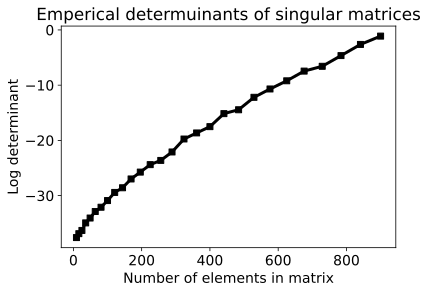

In [31]:
m_sizes= np.arange(3,31)

n_iter= 100

determinants= np.zeros((len(m_sizes),n_iter))

for ni in range(len(m_sizes)):
    for i in range(n_iter):
        # 1. Create a random square matrix
        A= np.random.randn(m_sizes[ni], m_sizes[ni])
        # 2. Reduce a rank of a matrix
        A[:,0]= A[:,1]
        # 3. Compute the determinant and store it as absolute value
        determinants[ni,i]= np.abs(np.linalg.det(A))

plt.figure(figsize=(6,4))
plt.plot(m_sizes**2,np.log(np.mean(determinants,axis=1)), 'ks-', linewidth=3)
plt.xlabel('Number of elements in matrix')
plt.ylabel('Log determinant')
plt.title('Emperical determuinants of singular matrices')
plt.show()

**INTERIM CONCLUSION**

- Singular matrices (rank-deficient matrices) theoretically have a determinant of exactly zero. However, due to computational limitations (e.g., floating-point precision), the determinant is often a very small number close to zero instead of being exactly zero.

- As the matrix size increases, the number of elements grows, and the determinants become numerically closer to zero. This is evident from the y-axis values becoming more negative (the logarithmic values decrease).
- The numerical inaccuracies arise because modern computing uses finite precision arithmetic. As matrix sizes increase, the chances of accumulating rounding errors grow, resulting in slightly non-zero determinant values even for singular matrices. This chart effectively visualizes the impact of these errors on the computed determinant.
- Despite being singular, the determinant values are not strictly zero due to computational precision issues, but they are consistently very small, decreasing exponentially with the size of the matrix.

